In [1]:
# Based on: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
from itertools import cycle, islice
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import time


# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

test_datasets = [noisy_circles, noisy_moons, blobs, no_structure, varied, aniso]

In [2]:
def show_results(model):
    plt.figure(figsize=(9 * 2 + 3, 12.5))
    plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                        hspace=.01)
    plot_num = 1

    for dataset in test_datasets:
        X, y = dataset
        X = StandardScaler().fit_transform(X)

        t0 = time.time()
        labels = model.fit_predict(X)
        t1 = time.time()

        print(labels)
        plt.subplot(2, 3, plot_num)
        plt.title("sup", size=18)
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(labels) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[labels])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

    plt.show()

In [3]:
! pip install metaheuristic_clustering

     |████████████████████████████████| 2.6 MB 12.7 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=5a9fd7098daa841362a8469d9488f9f083e706fda02601e89e9a78b9611003ff
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


iteration: 0
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
[1, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 1, 1, 

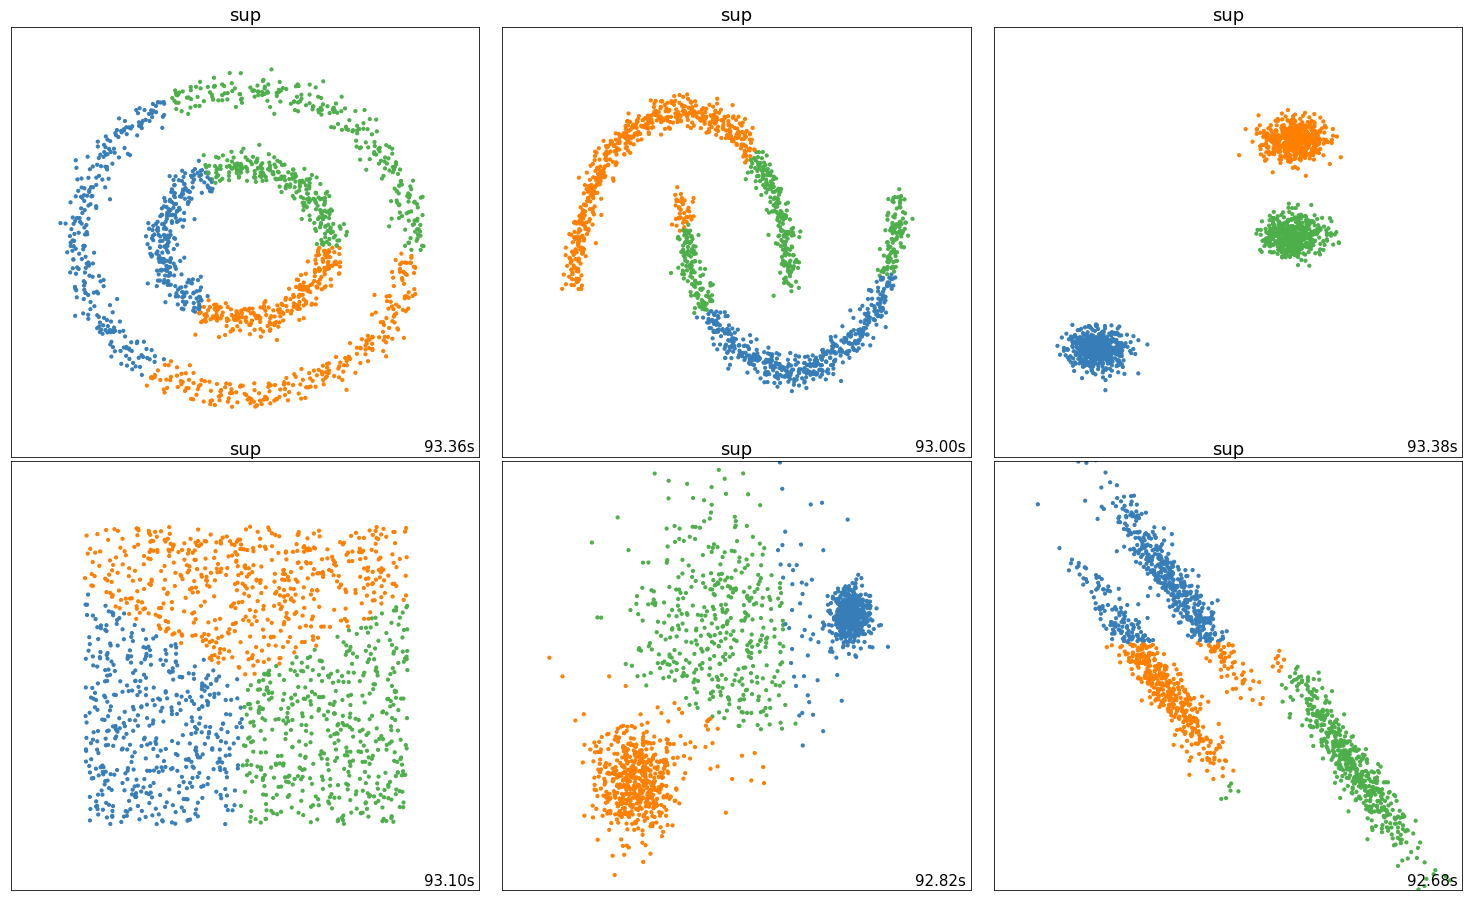

In [6]:
from metaheuristic_clustering.abc import ABCClustering

abc_model = ABCClustering()
show_results(abc_model)

[2, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 0, 

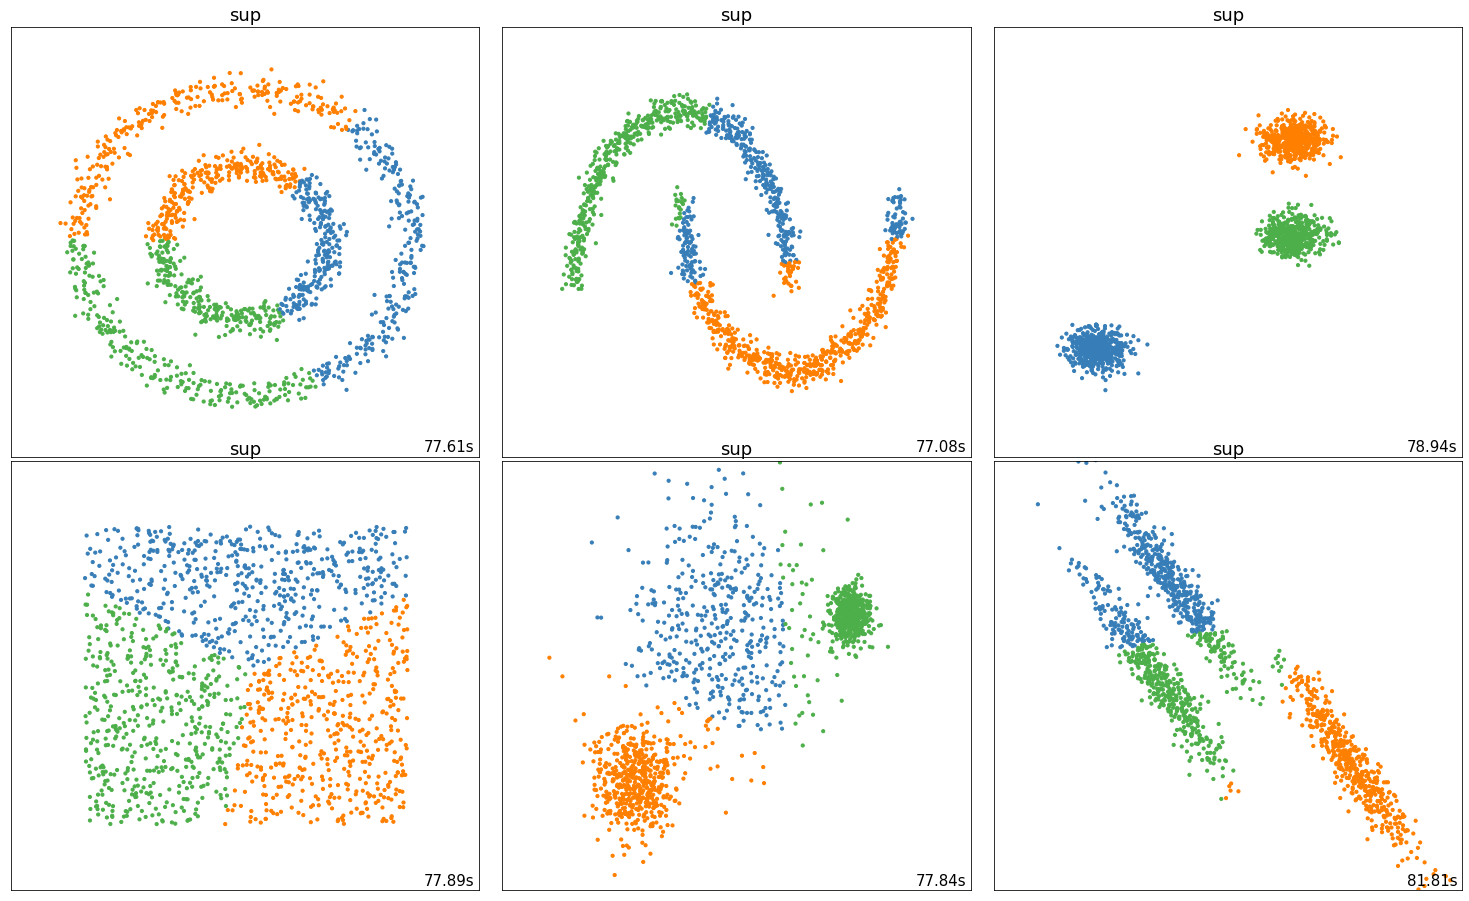

In [7]:
from metaheuristic_clustering.sfla import SFLAClustering

sfla_model = SFLAClustering()
show_results(sfla_model)